# 머신러닝 알고리즘 실습

## 지도 학습 (Supervised Learning)

### 데이터셋 준비 및 분석

Iris 데이터셋은 세 가지 종류의 아이리스 꽃(세토사, 버시컬러, 버지니카)에 대한 꽃받침과 꽃잎의 길이와 너비 정보를 담고 있습니다. 이 데이터셋을 이용해 다음의 알고리즘을 적용해보겠습니다: 나이브 베이즈, 의사결정 트리, SVM.

먼저, 데이터셋을 살펴보겠습니다.


In [11]:
%%capture

# 필요한 패키지 설치 
%pip install aibasics

> **Note**: 구글 Colab에서는 위의 패키지 설치 명령어를 실행한 후에 세션을 재시작해야 합니다. 메뉴에서 **런타임** > **런타임 다시 시작**을 선택하세요.


In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Iris 데이터셋 로드
iris = load_iris()
X = iris.data
y = iris.target
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df["species"] = y

# 데이터셋 확인
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


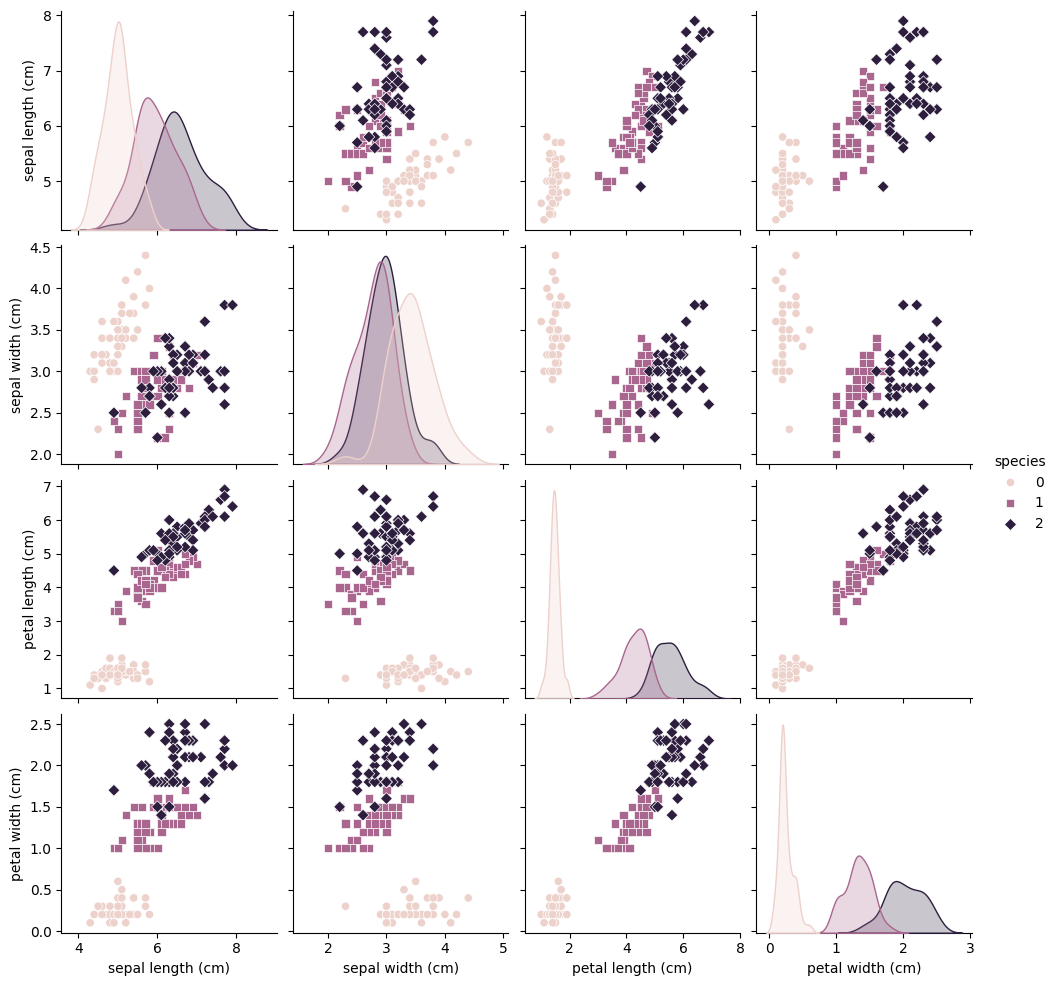

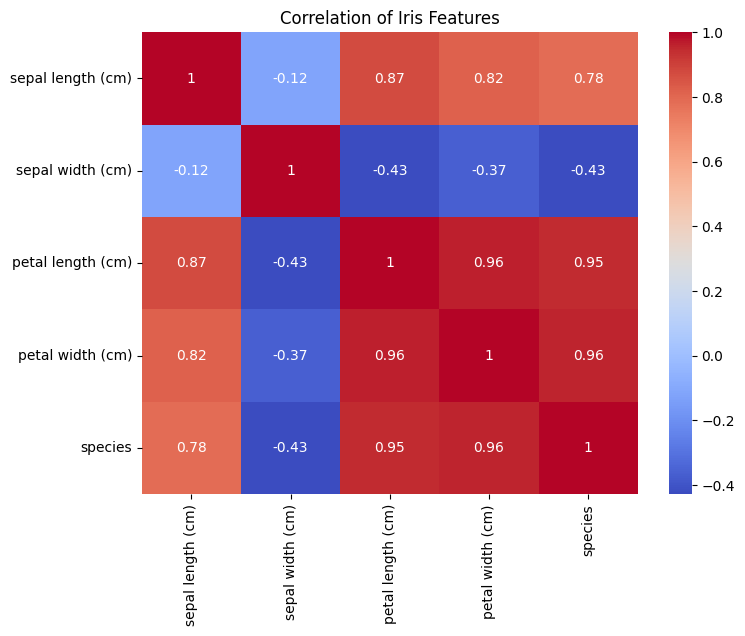

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iris 데이터셋의 기본적인 통계량 확인
iris_stats = iris_df.describe()
print(iris_stats)

# 종(species)별 특성 분포 확인을 위한 시각화
sns.pairplot(iris_df, hue="species", markers=["o", "s", "D"])
plt.show()

# 특성 간 상관 관계 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Iris Features")
plt.show()

1. **기본 통계량**:

   - 총 150개의 샘플
   - 꽃받침(Sepal)과 꽃잎(Petal)의 길이 및 너비에 대한 평균, 표준편차, 최소값, 최대값 등을 포함한 기본 통계량 제공
   - 예를 들어, 꽃잎 길이(petal length)의 평균은 약 3.76cm, 표준편차는 약 1.77cm

2. **특성 분포 및 종별 구분**:

   - Pairplot을 통해 각 특성(꽃받침과 꽃잎의 길이 및 너비) 간의 분포와 관계를 시각화
   - 다양한 색상의 점들은 서로 다른 아이리스 꽃 종(세토사, 버시컬러, 버지니카)을 나타냄
   - 꽃잎의 길이와 너비를 기준으로 종 간에 분명한 구분이 관찰됨

3. **특성 간 상관 관계**:
   - 특성 간의 상관 관계를 나타내는 히트맵 제공
   - 각 셀에는 두 특성 간의 상관 계수 표시
   - 예를 들어, 꽃잎 길이와 꽃잎 너비 간에는 높은 양의 상관 관계가 있음을 알 수 있음

이러한 분석을 통해 Iris 데이터셋의 기본적인 특성을 이해하고, 각 아이리스 종별로 특성이 어떻게 다른지 파악할 수 있습니다. 이는 향후 머신러닝 모델을 설계하고 훈련하는 데 있어 중요한 기초 정보를 제공합니다.


### 나이브 베이즈 분류기

나이브 베이즈는 조건부 확률을 기반으로 분류를 수행하는 간단하면서도 효과적인 알고리즘입니다.


In [3]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 나이브 베이즈 모델 생성 및 훈련
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = gnb.predict(X_test)

# 성능 평가
print("Naive Bayes 분류기의 정확도:", accuracy_score(y_test, y_pred))

Naive Bayes 분류기의 정확도: 0.9777777777777777


### 의사결정 트리

의사결정 트리는 데이터를 나누는 결정 규칙을 트리 구조로 나타내어 분류를 수행합니다.


In [4]:
# 의사결정 트리 모델 생성 및 훈련
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = dtc.predict(X_test)

# 성능 평가
print("의사결정 트리 분류기의 정확도:", accuracy_score(y_test, y_pred))

의사결정 트리 분류기의 정확도: 1.0


### SVM (Support Vector Machine)

SVM은 데이터를 가장 잘 구분하는 경계를 찾아내어 분류를 수행하는 알고리즘입니다.


In [5]:
# SVM 모델 생성 및 훈련
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = svm.predict(X_test)

# 성능 평가
print("SVM 분류기의 정확도:", accuracy_score(y_test, y_pred))

SVM 분류기의 정확도: 1.0


### 분류 알고리즘 적용 결과

1. **나이브 베이즈 분류기 (Naive Bayes Classifier)**:

   - 정확도: 약 97.78%

2. **의사결정 트리 (Decision Tree Classifier)**:

   - 정확도: 100%

3. **SVM (Support Vector Machine)**:

   - 정확도: 100%

이 결과들은 Iris 데이터셋에 세 가지 다른 분류 알고리즘을 적용한 것으로, 각 모델의 성능을 평가할 수 있는 좋은 예시가 됩니다. 의사결정 트리와 SVM이 완벽한 정확도를 보인 반면, 나이브 베이즈는 약간 낮은 정확도를 나타냈습니다. 이러한 차이는 각 알고리즘의 특성과 데이터셋의 특징에 기인할 수 있습니다.


## 비지도 학습 (Unsupervised Learning)

### 비지도 학습 알고리즘 적용

1. **K-means 클러스터링 결과**:

   - K-means 클러스터링을 사용하여 Iris 데이터셋을 3개의 클러스터로 그룹화한 결과입니다.
   - 주성분 분석(PCA)을 통해 차원을 축소하여 시각화를 수행했습니다.

2. **가우스 혼합 모델 클러스터링 결과**:
   - 가우스 혼합 모델을 사용하여 클러스터링을 수행한 결과입니다.
   - 이 또한 PCA를 사용하여 차원을 축소하고 시각화를 진행했습니다.


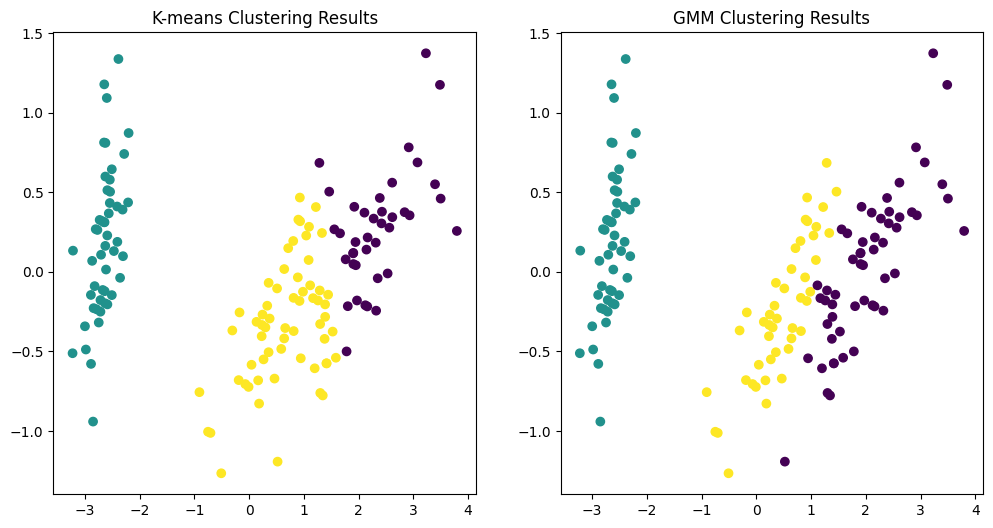

In [6]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters_kmeans = kmeans.labels_

# 가우스 혼합 모델
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)
clusters_gmm = gmm.predict(X)

# 주성분 분석 (PCA)을 통한 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 클러스터링 결과 시각화를 위한 준비
plt.figure(figsize=(12, 6))

# K-means 클러스터링 결과 시각화
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans)
plt.title("K-means Clustering Results")

# 가우스 혼합 모델 클러스터링 결과 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_gmm)
plt.title("GMM Clustering Results")

plt.show()

코드 설명:

- `KMeans`와 `GaussianMixture`를 각각 사용하여 클러스터링을 수행합니다.
- `PCA`를 사용하여 데이터의 차원을 축소하고, 이를 시각화합니다.
- 첫 번째 그래프는 K-means 클러스터링 결과를, 두 번째 그래프는 가우스 혼합 모델 클러스터링 결과를 보여줍니다.

위의 그래프들은 비지도 학습을 통해 Iris 데이터셋의 숨겨진 구조를 탐색하는 방법을 보여줍니다. 각 알고리즘은 데이터를 다른 방식으로 그룹화하여, 데이터의 다양한 특성을 강조합니다.


## 선형 회귀 모델 및 평균 제곱 오차(MSE) 시각화

### 선형 회귀 모델

- Iris 데이터셋의 꽃받침 길이(독립 변수)와 꽃잎 길이(종속 변수)를 사용하여 선형 회귀 모델을 구현하였습니다.
- 실제 데이터 포인트(파란색)와 선형 회귀 모델에 의한 예측값(빨간색)을 그래프로 나타냈습니다.

### 평균 제곱 오차(MSE)

- 계산된 평균 제곱 오차(MSE)는 약 0.743 입니다.
- 이 값은 모델이 데이터를 얼마나 잘 예측하는지를 나타내는 지표로, 낮을수록 예측 정확도가 높음을 의미합니다.


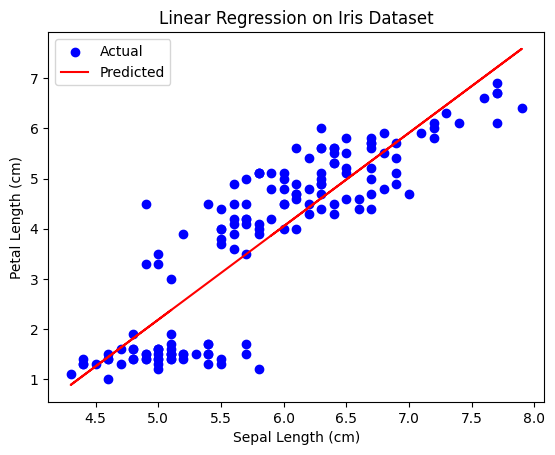

평균 제곱 오차(MSE): 0.7430610341321241


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Iris 데이터셋 로드 및 준비
iris = load_iris()
X = iris.data[:, :1]  # 첫 번째 특성만 사용 (꽃받침 길이)
y = iris.data[:, 2]  # 세 번째 특성을 종속 변수로 사용 (꽃잎 길이)

# 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측 및 MSE 계산
predictions = model.predict(X)
mse = mean_squared_error(y, predictions)

# 선형 회귀 모델 시각화
plt.scatter(X, y, color="blue", label="Actual")
plt.plot(X, predictions, color="red", label="Predicted")
plt.title("Linear Regression on Iris Dataset")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()

# MSE 출력
print("평균 제곱 오차(MSE):", mse)

위의 그래프와 MSE 값은 선형 회귀 모델이 어떻게 데이터의 패턴을 학습하고, 이를 통해 예측을 수행하는지 보여줍니다.


## 손실 함수와 비용 함수 시각화


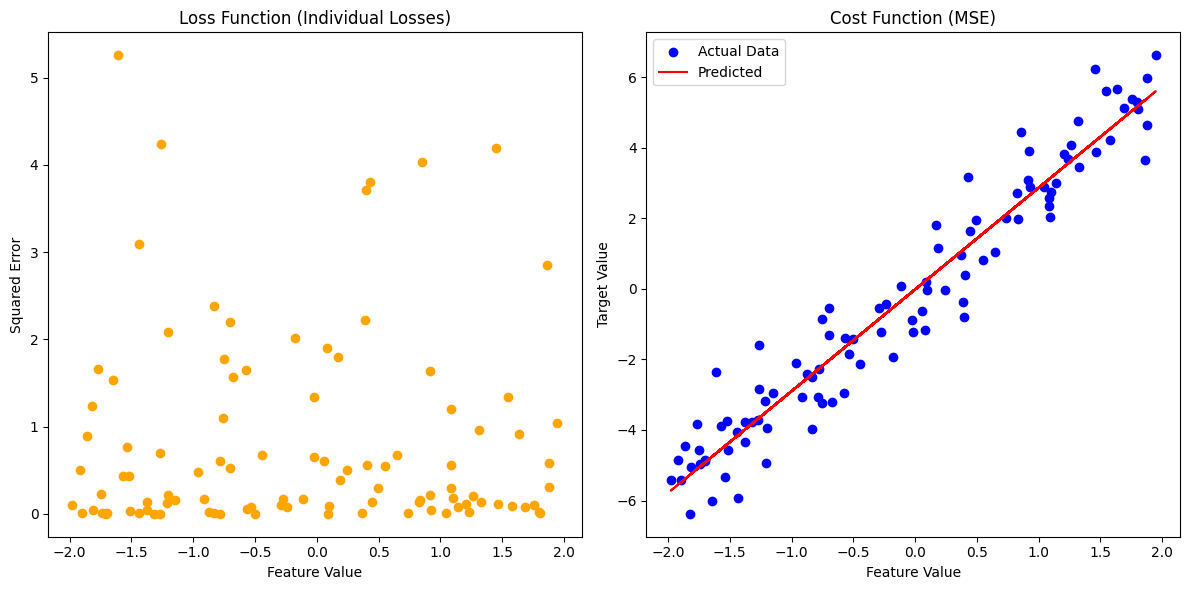

In [8]:
from sklearn.linear_model import LinearRegression

# Loss Function vs Cost Function 시각화를 위한 준비
np.random.seed(42)
X_new = np.random.rand(100, 1) * 4 - 2  # -2에서 2 사이의 랜덤값
y_new = 3 * X_new + np.random.randn(100, 1)

# 선형 회귀 모델을 사용하여 데이터에 적합
model_new = LinearRegression()
model_new.fit(X_new, y_new)
y_predict_new = model_new.predict(X_new)

# 개별 데이터 포인트에 대한 손실 (오차 제곱)
individual_losses = (y_new - y_predict_new) ** 2

# 비용 함수 (전체 데이터셋에 대한 MSE)
total_cost = np.mean(individual_losses)

# 시각화
plt.figure(figsize=(12, 6))

# 손실 함수 시각화 (개별 데이터 포인트에 대한 손실)
plt.subplot(1, 2, 1)
plt.scatter(X_new, individual_losses, color="orange")
plt.title("Loss Function (Individual Losses)")
plt.xlabel("Feature Value")
plt.ylabel("Squared Error")

# 비용 함수 시각화 (전체 데이터셋에 대한 평균 손실)
plt.subplot(1, 2, 2)
plt.scatter(X_new, y_new, color="blue", label="Actual Data")
plt.plot(X_new, y_predict_new, color="red", label="Predicted")
plt.title("Cost Function (MSE)")
plt.xlabel("Feature Value")
plt.ylabel("Target Value")
plt.legend()

plt.tight_layout()
plt.show()

### 손실 함수 (Loss Function)

- 왼쪽 그래프는 개별 데이터 포인트에 대한 손실(오차 제곱)을 나타냅니다.
- 각 데이터 포인트의 오차 제곱을 오렌지색 점으로 표시하여, 모델이 각 데이터에 얼마나 잘 맞는지를 시각적으로 보여줍니다.

### 비용 함수 (Cost Function)

- 오른쪽 그래프는 전체 데이터셋에 대한 모델의 평균 손실(비용 함수)을 나타냅니다.
- 파란색 점은 실제 데이터, 빨간색 선은 모델의 예측을 나타내며, 이를 통해 모델이 전체 데이터셋에 어떻게 적합되는지 보여줍니다.


## 경사하강법 시각화


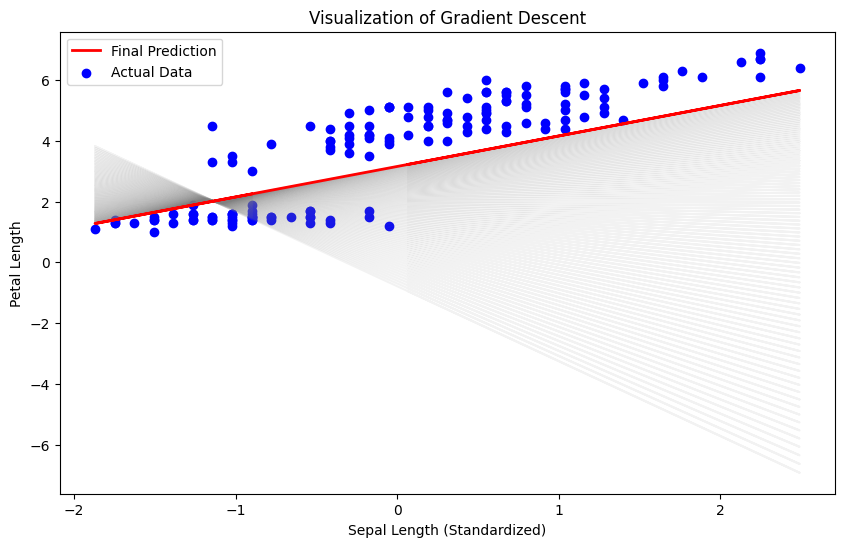

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Iris 데이터셋 로드 및 준비
iris = load_iris()
X = iris.data[:, :1]  # 첫 번째 특성만 사용 (꽃받침 길이)
y = iris.data[:, 2]  # 세 번째 특성을 종속 변수로 사용 (꽃잎 길이)

# 데이터 표준화 (Gradient Descent에 중요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


def gradient_descent(X, y, learning_rate=0.01, n_iterations=100):
    m = len(y)
    theta = np.random.randn(2, 1)  # 무작위 초기화
    gd_path = [theta]  # 경사 하강 경로 저장

    for _ in range(n_iterations):
        gradients = 2 / m * X.T.dot(X.dot(theta) - y)
        theta = theta - learning_rate * gradients
        gd_path.append(theta)

    return theta, np.array(gd_path)


# 추가적인 데이터 준비
X_b = np.c_[np.ones((len(X_scaled), 1)), X_scaled]  # 바이어스 추가
y = y.reshape(-1, 1)  # y를 열 벡터로 변환

# 경사 하강법 실행
theta, gd_path = gradient_descent(X_b, y)

# 경사 하강법 시각화
plt.figure(figsize=(10, 6))

# 모든 경로를 그래프로 표시
for i in range(len(gd_path)):
    y_predict = X_b.dot(gd_path[i])
    plt.plot(X_scaled, y_predict, color="gray", alpha=0.1)

# 최종 경로를 빨간색으로 강조
y_predict = X_b.dot(gd_path[-1])
plt.plot(X_scaled, y_predict, color="red", linewidth=2, label="Final Prediction")
plt.scatter(X_scaled, y, color="blue", label="Actual Data")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Petal Length")
plt.title("Visualization of Gradient Descent")
plt.legend()
plt.show()

위의 그래프는 경사하강법의 과정을 시각화한 것입니다. 각 회색 선은 경사하강법이 반복될 때마다 모델의 예측 선을 나타냅니다. 이 과정에서 각 단계의 예측선이 점차 실제 데이터(파란색 점)에 맞추어져 가는 것을 볼 수 있습니다.

- 초기에는 예측선이 데이터 포인트에서 멀리 떨어져 있지만, 반복될수록 실제 데이터에 점점 가까워집니다.
- 마지막에 도달한 빨간색 선은 최종 예측선으로, 데이터를 가장 잘 설명하는 선형 회귀선입니다.


## PCA와 정규화를 적용한 리지 회귀 모델 시각화

### PCA를 통한 차원 축소

- Iris 데이터셋의 특성을 주성분 분석(PCA)을 사용하여 2차원으로 축소하였습니다.
- 이를 통해 모델의 복잡도를 줄이고, 중요한 정보를 유지합니다.

### 정규화를 적용한 리지 회귀

- 리지 회귀(Ridge Regression)는 L2 정규화를 적용한 선형 회귀 모델입니다.
- 모델의 가중치에 제약을 추가하여 과대적합을 방지합니다.


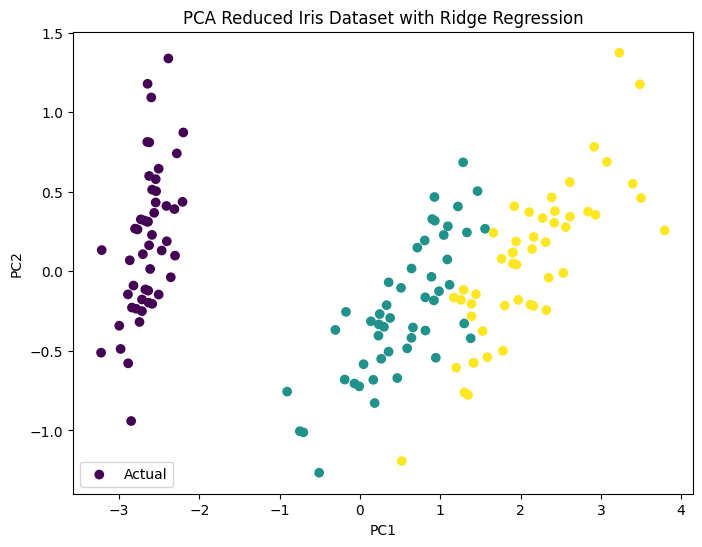

In [10]:
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge

# PCA를 사용한 차원 축소
pca = PCA(n_components=2)  # 주성분을 2개로 설정
X_reduced = pca.fit_transform(iris.data)

# 정규화를 적용한 리지 회귀 모델 생성 및 학습
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_reduced, iris.target)

# PCA 축소된 데이터와 리지 회귀 모델의 예측 시각화
plt.figure(figsize=(8, 6))
plt.scatter(
    X_reduced[:, 0], X_reduced[:, 1], c=iris.target, cmap="viridis", label="Actual"
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Reduced Iris Dataset with Ridge Regression")
plt.legend()
plt.show()

### 시각화

- PCA로 축소된 데이터에 리지 회귀 모델을 적용한 결과를 시각화하였습니다.
- 각 색상은 Iris 데이터셋의 다른 종을 나타냅니다.

이 시각화는 PCA를 통한 차원 축소와 정규화를 적용한 리지 회귀 모델이 어떻게 데이터의 중요한 특성을 유지하면서 모델의 복잡도를 줄이고, 과대적합을 방지하는지 보여줍니다.
